<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Examine-Data" data-toc-modified-id="Examine-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examine Data</a></span></li><li><span><a href="#Treat-Data" data-toc-modified-id="Treat-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treat Data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploring-Demographics" data-toc-modified-id="Exploring-Demographics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring Demographics</a></span><ul class="toc-item"><li><span><a href="#Students-who-only-registered" data-toc-modified-id="Students-who-only-registered-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Students who only registered</a></span><ul class="toc-item"><li><span><a href="#Compare-to-certificate-earners" data-toc-modified-id="Compare-to-certificate-earners-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Compare to certificate earners</a></span></li></ul></li><li><span><a href="#Activity-vs-Completion" data-toc-modified-id="Activity-vs-Completion-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Activity vs Completion</a></span><ul class="toc-item"><li><span><a href="#Days-Active-vs-Completion" data-toc-modified-id="Days-Active-vs-Completion-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Days Active vs Completion</a></span></li><li><span><a href="#Events-Vs-Completion" data-toc-modified-id="Events-Vs-Completion-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Events Vs Completion</a></span></li><li><span><a href="#Forum-Posts" data-toc-modified-id="Forum-Posts-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Forum Posts</a></span></li><li><span><a href="#Chapters-Read" data-toc-modified-id="Chapters-Read-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Chapters Read</a></span></li></ul></li><li><span><a href="#Viewed-Only" data-toc-modified-id="Viewed-Only-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Viewed Only</a></span><ul class="toc-item"><li><span><a href="#Engagement" data-toc-modified-id="Engagement-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Engagement</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Date-of-Birth" data-toc-modified-id="Date-of-Birth-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Date of Birth</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Course" data-toc-modified-id="Course-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Course</a></span></li></ul></li><li><span><a href="#Only-explored" data-toc-modified-id="Only-explored-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Only explored</a></span><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Date-of-Birth" data-toc-modified-id="Date-of-Birth-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Date of Birth</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Education</a></span></li></ul></li></ul></li><li><span><a href="#Causes-of-Non-Completion" data-toc-modified-id="Causes-of-Non-Completion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Causes of Non-Completion</a></span><ul class="toc-item"><li><span><a href="#Forum-Posts" data-toc-modified-id="Forum-Posts-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Forum Posts</a></span></li><li><span><a href="#Videos" data-toc-modified-id="Videos-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Videos</a></span></li></ul></li><li><span><a href="#Grade-Distribution" data-toc-modified-id="Grade-Distribution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Grade Distribution</a></span></li></ul></div>

# Objective

To Increase the **rate** of at which certificates are earned among students. This can be done demographically, by targeting more people who are likely to complete the course, by changing the product, identifying bottlenecks and eliminating them, by targeting students with more appropriate material, redefining "completion," or increasing engagement


# Examine Data

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('ggplot')

In [2]:
students = pd.read_csv("HMXPC13_DI_v2_5-14-14.csv")

In [3]:
students.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 20 columns):
course_id            641138 non-null object
userid_DI            641138 non-null object
registered           641138 non-null int64
viewed               641138 non-null int64
explored             641138 non-null int64
certified            641138 non-null int64
final_cc_cname_DI    641138 non-null object
LoE_DI               535130 non-null object
YoB                  544533 non-null float64
gender               554332 non-null object
grade                592766 non-null object
start_time_DI        641138 non-null object
last_event_DI        462184 non-null object
nevents              441987 non-null float64
ndays_act            478395 non-null float64
nplay_video          183608 non-null float64
nchapters            382385 non-null float64
nforum_posts         641138 non-null int64
roles                0 non-null float64
incomplete_flag      100161 non-null float64
dtypes: floa

In [5]:
students.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [6]:
#generate table of values for each column 

for name in students.columns.values:
    print(f"\nThe value table for {name} is:")
    print(students[name].value_counts())


The value table for course_id is:
HarvardX/CS50x/2012            169621
MITx/6.00x/2012_Fall            66731
MITx/6.00x/2013_Spring          57715
HarvardX/ER22x/2013_Spring      57406
HarvardX/PH207x/2012_Fall       41592
MITx/6.002x/2012_Fall           40811
HarvardX/PH278x/2013_Spring     39602
MITx/8.02x/2013_Spring          31048
HarvardX/CB22x/2013_Spring      30002
MITx/14.73x/2013_Spring         27870
MITx/6.002x/2013_Spring         22235
MITx/7.00x/2013_Spring          21009
MITx/3.091x/2012_Fall           14215
MITx/8.MReV/2013_Summer          9477
MITx/3.091x/2013_Spring          6139
MITx/2.01x/2013_Spring           5665
Name: course_id, dtype: int64

The value table for userid_DI is:
MHxPC130394596    16
MHxPC130200926    16
MHxPC130388108    16
MHxPC130126780    16
MHxPC130592976    16
MHxPC130027283    16
MHxPC130121287    16
MHxPC130574097    16
MHxPC130208203    16
MHxPC130183602    16
MHxPC130309858    16
MHxPC130464954    16
MHxPC130505428    16
MHxPC130357903    1

__Notes:__

* Perform string split on course_id to extract more useful information
* registered is a superflous variable
* viewed to explored could be a measure of engagement, but it doesn't seem like a priority
* explored seems like the metric to focus on
* make country data less granular
* lots of missing values. Try to infer if there is anything systemic about it.
* Think about how to standardize grade. Z standardization is probably the way to go.
* look at delta between start time and last event
* Brainstorm ideas for _Nevents_ variable
* nplay video is interesting, because it could be a positive sign of engagement or a sign of confusion
* look into nchapters, might be misleading if chapters vary significantly in length
* nforum_posts is a clear engagement metric
* _roles_ should be removed
* brainstorm ideas to deal with inconsistent data


# Treat Data

In [7]:
#drop unnecessary columns
students = students.drop(['registered', 'roles'], axis=1)

In [8]:
#Remove rows with inconsistent flags
#There is still enough data to work with, and not worth skewing results over bad data
students = students.drop(students[students.incomplete_flag == 1].index)

In [9]:
#split course ID
students['university'] = students.course_id.str.split("/").str[0]
students['course'] = students.course_id.str.split("/").str[1]
students['course_variant'] = students.course_id.str.split("/").str[2]

In [10]:
#standardize chapters (courses vary in length, so it makes more sense to look at chapters as a %)
#define function to map chapters to percentage

max_chapter_dict = students.groupby(['course_id']).nchapters.max().to_dict()

def chapter_percentage(df):
    """"function that maps the number of chapters completed by a student to the 
    percentage of the max chapters completed for the corresponding course
    """
    max_chapter = max_chapter_dict[df['course_id']]
    max_chapter = float(max_chapter)
    chapter_percentage = float(df['nchapters'])/max_chapter
    return chapter_percentage

#create new % column
students["chapter_percent"] = students.apply(chapter_percentage, axis=1)

In [11]:
#Map regions to continents


In [12]:
#Replace NaN values with 1 for n_days based on active_interval
students.ndays_act[np.isnan(students.ndays_act)] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#change LoE to numerical ranking
education_dict = {"LoE_DI":{'Less than Secondary':0, 'Secondary':1,
                 "Bachelor's":2, "Master's":3, "Doctorate":4}}
students.replace(education_dict, inplace=True)

#too few o genders, will just lead to overfiting
students = students.drop(students[students.gender == 'o'].index) 


In [14]:
#standardize grades
students.grade.replace('', np.nan, inplace=True)
students.grade.replace(' ', np.nan, inplace=True)
students.grade = pd.to_numeric(students.grade)
nonzero_grades = students[students.grade != 0]
nonzero_grades.groupby(['course_id']).grade.describe()

,count,mean,std,min,25%,50%,75%,max
course_id,,,,,,,,
HarvardX/CB22x/2013_Spring,2125.0,0.190151,0.273948,0.01,0.02,0.05,0.20,1.00
HarvardX/CS50x/2012,1286.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
HarvardX/ER22x/2013_Spring,5686.0,0.405900,0.371357,0.01,0.04,0.26,0.79,1.00
HarvardX/PH207x/2012_Fall,8611.0,0.301795,0.366249,0.01,0.02,0.09,0.62,1.01
HarvardX/PH278x/2013_Spring,3238.0,0.266121,0.283718,0.01,0.05,0.14,0.42,0.89
MITx/14.73x/2013_Spring,6253.0,0.333109,0.345071,0.01,0.03,0.15,0.70,1.00
MITx/2.01x/2013_Spring,1064.0,0.270282,0.324696,0.01,0.06,0.06,0.55,1.00
MITx/3.091x/2012_Fall,2038.0,0.334828,0.368710,0.01,0.04,0.09,0.74,1.00
MITx/3.091x/2013_Spring,662.0,0.231541,0.316330,0.01,0.03,0.04,0.33,0.97


In [15]:
nonzero_grades.groupby(['university']).grade.describe()

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
HarvardX,20946.0,0.356081,0.379488,0.01,0.03,0.14,0.77,1.01
MITx,52997.0,0.233359,0.321985,0.01,0.01,0.04,0.37,1.00


In [16]:
nonzero_grades.groupby(['course']).grade.describe()

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
14.73x,6253.0,0.333109,0.345071,0.01,0.03,0.15,0.70,1.00
2.01x,1064.0,0.270282,0.324696,0.01,0.06,0.06,0.55,1.00
3.091x,2700.0,0.309504,0.359283,0.01,0.04,0.08,0.69,1.00
6.002x,8907.0,0.296782,0.362546,0.01,0.03,0.08,0.60,1.00
6.00x,24885.0,0.173598,0.285661,0.01,0.01,0.02,0.20,1.00
7.00x,3651.0,0.244092,0.303034,0.01,0.02,0.06,0.46,0.99
8.02x,3860.0,0.244997,0.327470,0.01,0.01,0.05,0.40,1.00
8.MReV,1677.0,0.215194,0.282435,0.01,0.02,0.06,0.36,1.00
CB22x,2125.0,0.190151,0.273948,0.01,0.02,0.05,0.20,1.00


Here we can see that the courses have very different grading, with means as high as 1 and as low as 0.23

Need to do a deeper exploration of why some courses have a lower average grade

In [17]:
#clean dates
students.last_event_DI = pd.to_datetime(students.last_event_DI)
students.start_time_DI = pd.to_datetime(students.start_time_DI)

# Feature Engineering

In [201]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540969 entries, 5 to 641136
Data columns (total 28 columns):
course_id            540969 non-null object
userid_DI            540969 non-null object
viewed               540969 non-null int64
explored             540969 non-null int64
certified            540969 non-null int64
final_cc_cname_DI    540969 non-null object
LoE_DI               451973 non-null float64
YoB                  458828 non-null float64
gender               467156 non-null object
grade                489080 non-null float64
start_time_DI        540969 non-null datetime64[ns]
last_event_DI        447620 non-null datetime64[ns]
nevents              441983 non-null float64
ndays_act            540969 non-null float64
nplay_video          181612 non-null float64
nchapters            309813 non-null float64
nforum_posts         540969 non-null int64
incomplete_flag      0 non-null float64
university           540969 non-null object
course               540969 non-null o

**Classify Students by Activity**

In [110]:
students['only_registered'] = np.where((students.viewed == 0) & (students.explored == 0), 1, 0)
students['only_viewed'] = np.where((students.viewed == 1) & (students.explored == 0), 1, 0)
students['only_explored'] = np.where((students.explored == 1) & (students.certified == 0), 1, 0)

**Metrics for Interaction**

In [341]:
students['eventsPerDay'] = students.nevents/students.ndays_act
students['active_interval'] = students.last_event_DI - students.start_time_DI
students.active_interval = students.active_interval.fillna(0)
students['postsPerDay'] = students.nforum_posts/students.ndays_act
students['videosPerDay'] = students.nplay_video/students.ndays_act

# Exploring Demographics

## Students who only registered

In [21]:
registration = students[students.only_registered == 1]

In [233]:
registration.describe()

,viewed,explored,certified,LoE_DI,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,chapter_percent,only_registered,only_viewed,only_explored,eventsPerDay,active_interval,postsPerDay
count,214953.0,214953.0,214953.0,184931.000000,188787.000000,1.924180e+05,117774.000000,214953.000000,126.000000,1644.000000,214953.000000,0.0,1644.000000,214953.0,214953.0,214953.0,117774.000000,214953,214953.000000
mean,0.0,0.0,0.0,1.925588,1985.007130,6.236423e-07,3.120918,1.145097,3.079365,2.204380,0.000233,NaN,0.115972,1.0,0.0,0.0,2.383850,14 days 20:01:53.550404,0.000163
std,0.0,0.0,0.0,0.834298,8.783136,1.367808e-04,10.876929,0.537451,4.184931,2.452138,0.016425,NaN,0.116257,0.0,0.0,0.0,5.864288,55 days 22:01:51.015417,0.012251
min,0.0,0.0,0.0,0.000000,1931.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.020833,1.0,0.0,0.0,0.142857,-381 days +00:00:00,0.000000
25%,0.0,0.0,0.0,1.000000,1982.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.055556,1.0,0.0,0.0,1.000000,0 days 00:00:00,0.000000
50%,0.0,0.0,0.0,2.000000,1987.000000,0.000000e+00,2.000000,1.000000,2.000000,2.000000,0.000000,NaN,0.083333,1.0,0.0,0.0,1.000000,0 days 00:00:00,0.000000
75%,0.0,0.0,0.0,2.000000,1991.000000,0.000000e+00,3.000000,1.000000,3.000000,2.000000,0.000000,NaN,0.142857,1.0,0.0,0.0,2.000000,0 days 00:00:00,0.000000
max,0.0,0.0,0.0,4.000000,2013.000000,3.000000e-02,1357.000000,29.000000,38.000000,28.000000,2.000000,NaN,1.000000,1.0,0.0,0.0,598.000000,404 days 00:00:00,2.000000


1. Students only active 2 weeks on average
2. Most will only interact once per day
3. Most will only look at 2 chapters or 11% of content
4. Most are college level

In [23]:
##days active
print(len(registration[registration.ndays_act ==1])/len(registration))
print(len(registration[registration.ndays_act >1])/len(registration))
print(len(registration[registration.active_interval <="0 days"])/len(registration))

0.8976008708880546
0.1023991291119454
0.7827385521486092


In [24]:
registration.ndays_act.value_counts()/len(registration)

1.0     0.897601
2.0     0.076310
3.0     0.017627
4.0     0.004922
5.0     0.001842
6.0     0.000749
7.0     0.000381
8.0     0.000219
9.0     0.000088
10.0    0.000060
13.0    0.000051
12.0    0.000037
11.0    0.000033
15.0    0.000033
14.0    0.000019
16.0    0.000014
29.0    0.000005
24.0    0.000005
20.0    0.000005
Name: ndays_act, dtype: float64

**GENDER**

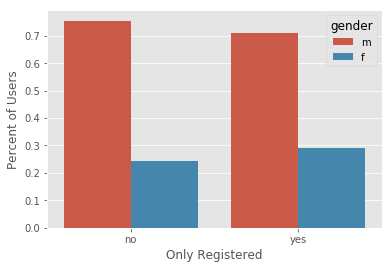

In [101]:
x, y, hue = "only_registered", "prop", "gender"
gender_prop = (students["gender"]
                               .groupby(students["only_registered"])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
gender_prop = plt.xlabel("Only Registered")
plt.xticks([0,1], ['no', 'yes'])
gender_prop = plt.ylabel("Percent of Users")
plt.savefig("registerOnlyGender.png")
plt.show()

Women seem to only register at a higher rate than men

**Date of Birth**

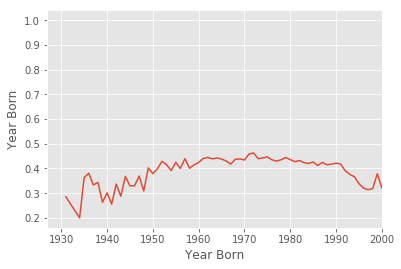

In [26]:
_ = students.groupby('YoB')['only_registered'].mean().plot()
_ = plt.xlabel("Year Born")
_ = plt.ylabel("Year Born")
_ = plt.xlim(right=2000)

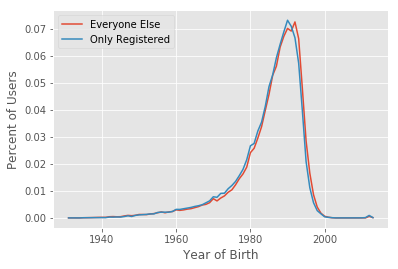

In [95]:
x, y, hue =  "YoB", "prop", "only_registered"
education_prop = (students[x]
                               .groupby(students[hue])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.lineplot, "data"), x=x, y=y, hue=hue))
education_prop = plt.xlabel("Year of Birth")
education_prop = plt.ylabel("Percent of Users")
_ = plt.legend(('Everyone Else', 'Only Registered'))
plt.savefig("registerOnlyYob.png")
plt.show()

Spike at top is due to lack of data, but clear correlation with age

**Education**

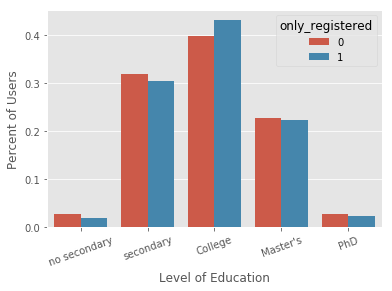

In [108]:
x, y, hue =  "LoE_DI", "prop", "only_registered"
education_prop = (students[x]
                               .groupby(students[hue])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
education_prop = plt.xlabel("Level of Education")
education_prop = plt.ylabel("Percent of Users")
plt.xticks([0,1,2,3,4], labels=['no secondary', 'secondary', 'College', "Master's", 'PhD'], rotation=20)
plt.savefig("registerOnlyEducation.png")
plt.show()

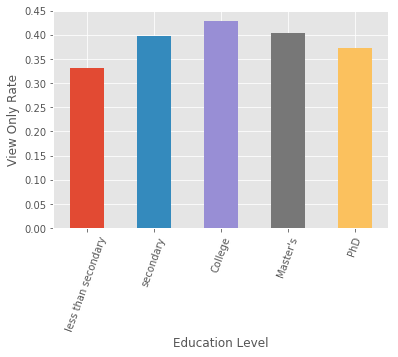

In [97]:
_ = students.groupby('LoE_DI')['only_registered'].mean().plot(kind="bar")
_ = plt.xlabel("Education Level")
_ = plt.ylabel("View Only Rate")
_ = plt.xticks([0,1,2,3,4], labels=['less than secondary', 'secondary', 'College', "Master's", 'PhD'], rotation=70)

**Course**

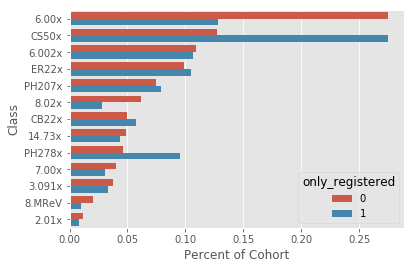

In [199]:
x, y, hue =  "course", "prop", "only_registered"
education_prop = (students[x]
                               .groupby(students[hue])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.barplot, "data"), x=y, y=x, hue=hue))
education_prop = plt.xlabel("Percent of Cohort")
education_prop = plt.ylabel("Class")
plt.savefig("registerByClass.png")
plt.show()

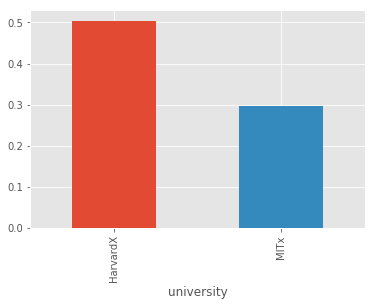

In [200]:
students.groupby('university')['only_registered'].mean().plot(kind="bar")

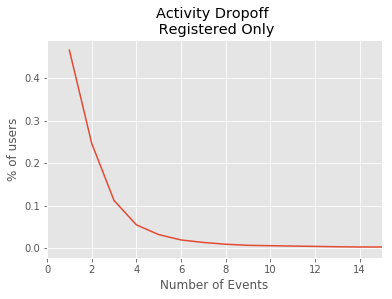

In [279]:
registration.nevents.value_counts(normalize=True).plot()
plt.xlim(left=0, right=15)
plt.ylabel("% of users")
plt.xlabel("Number of Events")
plt.title("Activity Dropoff \n Registered Only")
plt.savefig("RegisterEvents.png")

### Compare to certificate earners

In [112]:
register_comp = viewed = students[(students.only_registered == 1) | (students.certified == 1)]

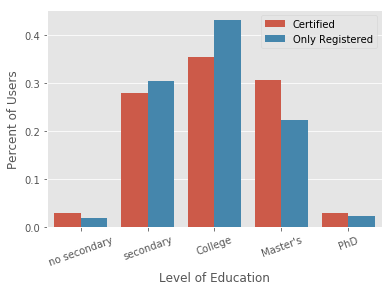

In [129]:
x, y, hue =  "LoE_DI", "prop", "only_registered"
education_prop = (register_comp[x]
                               .groupby(register_comp[hue])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
education_prop = plt.xlabel("Level of Education")
education_prop = plt.ylabel("Percent of Users")
plt.xticks([0,1,2,3,4], labels=['no secondary', 'secondary', 'College', "Master's", 'PhD'], rotation=20)
L=plt.legend()
L.get_texts()[0].set_text('Certified')
L.get_texts()[1].set_text('Only Registered')
plt.savefig("registerVsCertEducation.png")
plt.show()

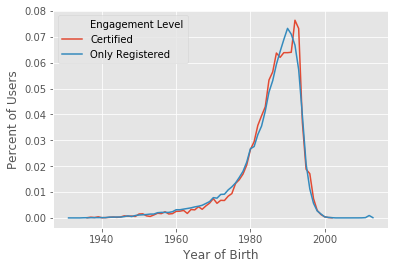

In [136]:
x, y, hue =  "YoB", "prop", "only_registered"
education_prop = (register_comp[x]
                               .groupby(register_comp[hue])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.lineplot, "data"), x=x, y=y, hue=hue))
education_prop = plt.xlabel("Year of Birth")
education_prop = plt.ylabel("Percent of Users")
L=plt.legend()
L.get_texts()[0].set_text('Engagement Level')
L.get_texts()[1].set_text('Certified')
L.get_texts()[2].set_text('Only Registered')
plt.savefig("registerVsCertYob.png")
plt.show()

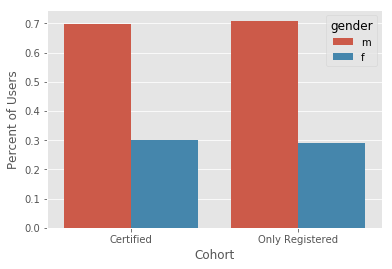

In [139]:
x, y, hue = "only_registered", "prop", "gender"
gender_prop = (register_comp["gender"]
                               .groupby(register_comp["only_registered"])
                               .value_counts(normalize=True)
                               .rename(y)
                               .reset_index()
                               .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
gender_prop = plt.xlabel("Cohort")
plt.xticks([0,1], ['Certified', 'Only Registered'])
gender_prop = plt.ylabel("Percent of Users")
plt.savefig("registerCompGender.png")
plt.show()

In [182]:
x, y, hue =  "LoE_DI", "prop", "only_registered"
ed_table = register_comp[x].groupby(register_comp[hue]).value_counts().rename(y).reset_index()
observed = ed_table[ed_table.only_registered == 0][["LoE_DI", "prop"]]
observed.set_index('LoE_DI', inplace=True)
expected = ed_table[ed_table.only_registered == 1][["LoE_DI", "prop"]]
expected.set_index('LoE_DI', inplace=True)
exp_ratios = expected/expected.prop.sum()
expected = exp_ratios * observed.prop.sum()
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

prop    732.314039
dtype: float64


In [197]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.]


array([1.])

## Activity vs Completion

### Days Active vs Completion

In [349]:
print(students.certified.value_counts())
students_majority = students[students.certified==0]
students_minority = students[students.certified==1]
# Upsample minority class
students_minority_upsampled = resample(students_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=523294,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
students_balanced = pd.concat([students_majority, students_minority_upsampled])
print(students_balanced.certified.value_counts())

0    523294
1     17675
Name: certified, dtype: int64
1    523294
0    523294
Name: certified, dtype: int64


In [33]:
X = students_balanced.loc[:,['ndays_act']]
y = students_balanced.loc[:,["certified"]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [35]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred = LogReg.predict(X_test)

In [37]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[149640,   6976],
       [ 14328, 143033]])

In [38]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93    156616
           1       0.95      0.91      0.93    157361

   micro avg       0.93      0.93      0.93    313977
   macro avg       0.93      0.93      0.93    313977
weighted avg       0.93      0.93      0.93    313977

0.9321478961834784


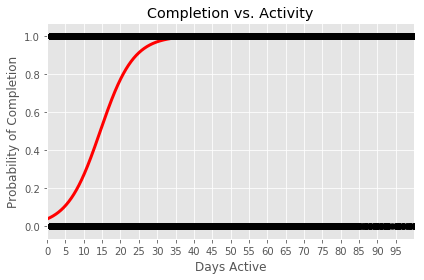

In [39]:
plt.figure(1)
plt.clf()
plt.scatter(X.values.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 200, 2000)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * LogReg.coef_ + LogReg.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.xlim(0, 100)
plt.ylabel('Probability of Completion')
plt.xlabel('Days Active')
plt.xticks(range(0, 100, 5))
plt.title("Completion vs. Activity")
plt.tight_layout()
plt.savefig('DaysActiveCurve.png')
plt.show()

### Events Vs Completion

In [238]:
X = students_balanced.loc[:,['eventsPerDay']].fillna(0)
y = students_balanced.loc[:,["certified"]]

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [240]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [241]:
y_pred = LogReg.predict(X_test)

In [242]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[134798,  21818],
       [ 29688, 127673]])

In [243]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84    156616
           1       0.85      0.81      0.83    157361

   micro avg       0.84      0.84      0.84    313977
   macro avg       0.84      0.84      0.84    313977
weighted avg       0.84      0.84      0.84    313977

0.8359561369144873


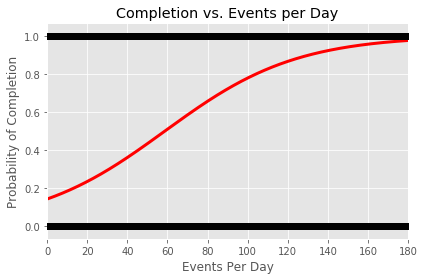

In [248]:
plt.figure(1)
plt.clf()
plt.scatter(X.values.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 200, 2000)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * LogReg.coef_ + LogReg.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.xlim(0, 100)
plt.ylabel('Probability of Completion')
plt.xlabel('Events Per Day')
plt.xticks(range(0, 200, 20))
plt.title("Completion vs. Events per Day")
plt.tight_layout()
plt.savefig('EventsCurve.png')
plt.show()

### Forum Posts

In [249]:
X = students_balanced.loc[:,['postsPerDay']]
y = students_balanced.loc[:,["certified"]]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [251]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [252]:
y_pred = LogReg.predict(X_test)

In [253]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[154984,   1632],
       [140786,  16575]])

In [254]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.99      0.69    156616
           1       0.91      0.11      0.19    157361

   micro avg       0.55      0.55      0.55    313977
   macro avg       0.72      0.55      0.44    313977
weighted avg       0.72      0.55      0.44    313977

0.5464062654270854


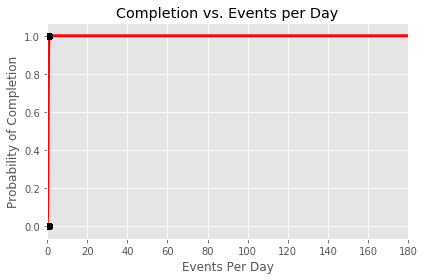

In [267]:
plt.figure(1)
plt.clf()
plt.scatter(X.values.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 200, 2000)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * LogReg.coef_ + LogReg.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.xlim(0, 100)
plt.ylabel('Probability of Completion')
plt.xlabel('Events Per Day')
plt.xticks(range(0, 200, 20))
plt.title("Completion vs. Events per Day")
plt.tight_layout()
#plt.savefig('EventsCurve.png')
plt.show()

### Chapters Read

In [258]:
X = students_balanced.loc[:,['chapter_percent']].fillna(0)
y = students_balanced.loc[:,["certified"]]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [260]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [261]:
y_pred = LogReg.predict(X_test)

In [262]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[150220,   6396],
       [  5699, 151662]])

In [263]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    156616
           1       0.96      0.96      0.96    157361

   micro avg       0.96      0.96      0.96    313977
   macro avg       0.96      0.96      0.96    313977
weighted avg       0.96      0.96      0.96    313977

0.961478070049717


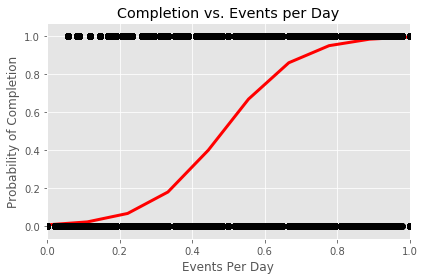

In [265]:
plt.figure(1)
plt.clf()
plt.scatter(X.values.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 1, 10)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * LogReg.coef_ + LogReg.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.xlim(0, 1)
plt.ylabel('Probability of Completion')
plt.xlabel('Events Per Day')
#plt.xticks(range(0, 200, 20))
plt.title("Completion vs. Events per Day")
plt.tight_layout()
#plt.savefig('EventsCurve.png')
plt.show()

## Viewed Only

In [302]:
viewed = students[students.only_viewed == 1]

In [291]:
viewed.describe()

,viewed,explored,certified,LoE_DI,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,chapter_percent,only_registered,only_viewed,only_explored,eventsPerDay,active_interval,postsPerDay
count,232628.000000,232628.000000,232628.000000,198691.000000,202595.000000,210093.000000,135449.000000,232628.000000,13432.000000,19319.000000,232628.000000,0.0,19319.000000,232628.000000,232628.000000,232628.0,135449.000000,232628,232628.000000
mean,0.075980,0.073018,0.075980,1.932765,1985.039769,0.070303,676.478549,4.622358,657.178082,15.481288,0.016271,NaN,0.808112,0.924020,0.002962,0.0,16.498733,25 days 17:24:55.228433,0.000465
std,0.264966,0.260166,0.264966,0.840033,8.757802,0.235036,2297.341440,14.152359,858.829586,7.487544,0.255815,NaN,0.259667,0.264966,0.054342,0.0,44.255323,68 days 10:19:18.772286,0.012755
min,0.000000,0.000000,0.000000,0.000000,1931.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.020833,0.000000,0.000000,0.0,0.142857,-381 days +00:00:00,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1982.000000,0.000000,1.000000,1.000000,146.000000,12.000000,0.000000,NaN,0.777778,1.000000,0.000000,0.0,1.000000,0 days 00:00:00,0.000000
50%,0.000000,0.000000,0.000000,2.000000,1987.000000,0.000000,2.000000,1.000000,413.000000,15.000000,0.000000,NaN,0.911765,1.000000,0.000000,0.0,1.666667,0 days 00:00:00,0.000000
75%,0.000000,0.000000,0.000000,3.000000,1991.000000,0.000000,4.000000,1.000000,850.000000,18.000000,0.000000,NaN,0.970588,1.000000,0.000000,0.0,3.000000,1 days 00:00:00,0.000000
max,1.000000,1.000000,1.000000,4.000000,2013.000000,1.010000,61376.000000,162.000000,19179.000000,48.000000,20.000000,NaN,1.000000,1.000000,1.000000,0.0,1462.000000,409 days 00:00:00,2.000000


1. Same number of chapters as only registered
2. Most will only interact once per day
3. Most will only look at 2 chapters or 11% of content
4. Slightly lower education level
5. much more active

### Engagement

In [63]:
##days active
print(len(viewed[viewed.ndays_act ==1])/len(viewed))
print(len(viewed[viewed.ndays_act >1])/len(viewed))
print(len(viewed[viewed.active_interval <="0 days"])/len(viewed))

0.32489068129566506
0.675109318704335
0.23842400746245365


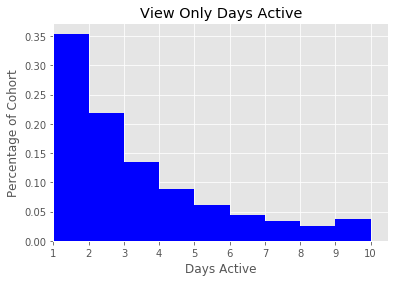

In [64]:
viewed.ndays_act.hist(density=True, range=[0, 10], bins=10, color="blue")
plt.xlim(left=1)
plt.xticks(range(1, 11))
plt.xlabel("Days Active")
plt.ylabel("Percentage of Cohort")
plt.title("View Only Days Active")
plt.savefig("viewOnlyActivity.png")

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


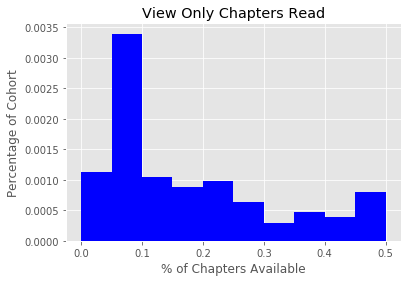

In [270]:
weights = np.ones_like(viewed.chapter_percent)/float(len(viewed.chapter_percent))
plt.hist(viewed.chapter_percent, weights=weights, range=[0,0.5], bins=10, color="blue")
plt.xlabel("% of Chapters Available")
plt.ylabel("Percentage of Cohort")
plt.title("View Only Chapters Read")
plt.savefig("viewOnlyChapters.png")

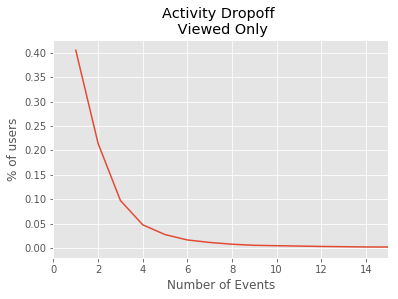

In [280]:
viewed.nevents.value_counts(normalize=True).plot()
plt.xlim(left=0, right=15)
plt.ylabel("% of users")
plt.xlabel("Number of Events")
plt.title("Activity Dropoff \n Viewed Only")
plt.savefig("viewdRegisterEvents.png")

### Gender

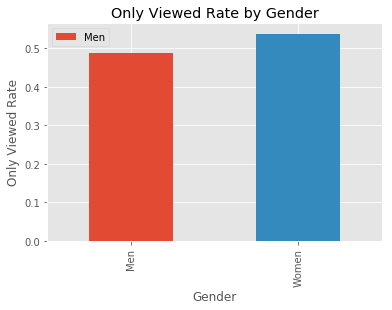

In [282]:
ovByGender = students.groupby('gender')['only_viewed'].mean()
_ = ovByGender.plot.bar(title="Only Viewed Rate by Gender")
_ = plt.xlabel("Gender")
_ = plt.xticks([0,1],["Men", "Women"])
_ = plt.ylabel("Only Viewed Rate")
_ = plt.legend(('Men', 'Women'))


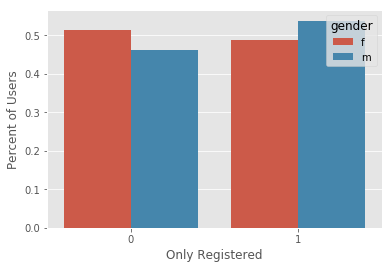

gender
f    0.486511
m    0.537813
Name: only_viewed, dtype: float64

In [73]:
x, y, hue = "only_viewed", "prop", "gender"
gender_prop = (students[x]
                       .groupby(students[hue])
                       .value_counts(normalize=True)
                       .rename(y)
                       .reset_index()
                       .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
gender_prop = plt.xlabel("Only Registered")
gender_prop = plt.ylabel("Percent of Users")
plt.show()
ovByGender

Women seem to only view at a higher rate than men

### Date of Birth

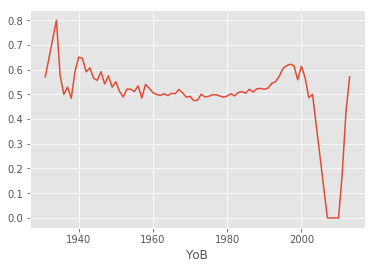

In [47]:
students.groupby('YoB')['only_viewed'].mean().plot()

dip at the bottom is due to a lack of data for those years

### Education

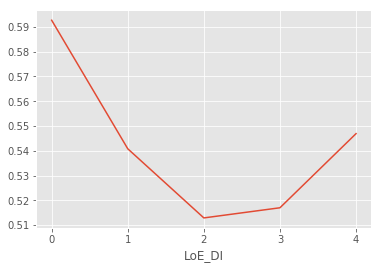

In [48]:
students.groupby('LoE_DI')['only_viewed'].mean().plot(xticks=[0,1,2,3,4])

students with Bachelor's and Master's degree have lowest view only rate

### Course

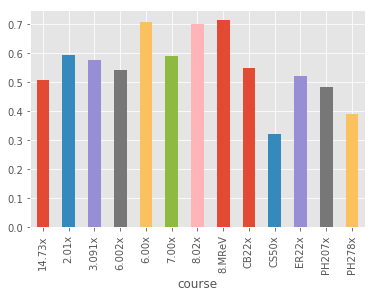

In [49]:
students.groupby('course')['only_viewed'].mean().plot(kind='bar')

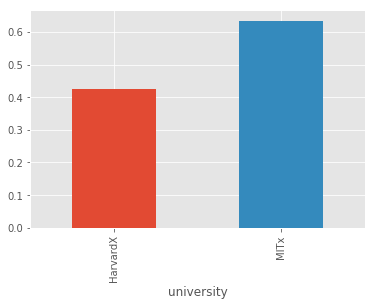

In [268]:
students.groupby('university')['only_viewed'].mean().plot(kind="bar")

## Only explored

This is the group I am most interested in. Since they have boasted the most commitment to the course, but still did not earn a certificate. I want to understand if this was due to motivation, difficulty

In [283]:
students.explored.mean()

0.06957699979111558

In [84]:
students[students.certified == 1].count()/len(students)

course_id            0.032673
userid_DI            0.032673
viewed               0.032673
explored             0.032673
certified            0.032673
final_cc_cname_DI    0.032673
LoE_DI               0.025436
YoB                  0.025525
gender               0.026005
grade                0.032673
start_time_DI        0.032673
last_event_DI        0.032673
nevents              0.032673
ndays_act            0.032673
nplay_video          0.024597
nchapters            0.032673
nforum_posts         0.032673
incomplete_flag      0.000000
university           0.032673
course               0.032673
course_variant       0.032673
chapter_percent      0.032673
only_registered      0.032673
only_viewed          0.032673
only_explored        0.032673
eventsPerDay         0.032673
active_interval      0.032673
postsPerDay          0.032673
dtype: float64

In [284]:
explored = students[students.explored == 1 ]

In [285]:
explored.describe()

,viewed,explored,certified,LoE_DI,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,chapter_percent,only_registered,only_viewed,only_explored,eventsPerDay,active_interval,postsPerDay
count,37639.000000,37639.0,37639.000000,29570.000000,29772.000000,36740.000000,37639.000000,37639.000000,23790.000000,37639.000000,37639.000000,0.0,37639.000000,37639.0,37639.0,37639.000000,37639.000000,37639,37639.000000
mean,0.999841,1.0,0.451287,1.986811,1984.993719,0.453887,3369.528043,32.640692,550.434889,14.448418,0.140227,NaN,0.811626,0.0,0.0,0.548713,91.661892,148 days 14:22:18.080182,0.003390
std,0.012625,0.0,0.497628,0.902776,9.116362,0.389936,3781.258967,26.076337,820.407163,6.275304,0.707799,NaN,0.168577,0.0,0.0,0.497628,83.173569,78 days 15:28:45.026809,0.017849
min,0.000000,1.0,0.000000,0.000000,1931.000000,0.000000,1.000000,1.000000,1.000000,6.000000,0.000000,NaN,0.473684,0.0,0.0,0.000000,0.250000,-194 days +00:00:00,0.000000
25%,1.000000,1.0,0.000000,1.000000,1982.000000,0.000000,362.000000,12.000000,101.000000,11.000000,0.000000,NaN,0.666667,0.0,0.0,0.000000,28.738636,97 days 00:00:00,0.000000
50%,1.000000,1.0,0.000000,2.000000,1987.000000,0.470000,2123.000000,27.000000,318.000000,12.000000,0.000000,NaN,0.842105,0.0,0.0,1.000000,83.750000,140 days 00:00:00,0.000000
75%,1.000000,1.0,1.000000,3.000000,1991.000000,0.850000,5203.000000,48.000000,701.000000,17.000000,0.000000,NaN,0.947368,0.0,0.0,1.000000,128.648011,193 days 00:00:00,0.000000
max,1.000000,1.0,1.000000,4.000000,2013.000000,1.010000,61376.000000,162.000000,34596.000000,48.000000,20.000000,NaN,1.000000,0.0,0.0,1.000000,2457.153846,409 days 00:00:00,0.714286


1. Same number of chapters as only registered
2. Most will only interact once per day
3. Most will only look at 2 chapters or 11% of content
4. Slightly lower education level
5. much more active

### Gender

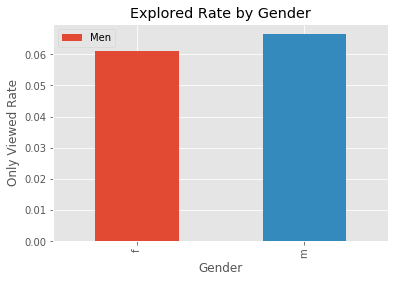

In [289]:
ovByGender = students.groupby('gender')['explored'].mean()
_ = ovByGender.plot.bar(title="Explored Rate by Gender")
_ = plt.xlabel("Gender")
_ = plt.ylabel("Only Viewed Rate")
_ = plt.legend(('Men', 'Women'))


Women seem to only view at a higher rate than men

### Date of Birth

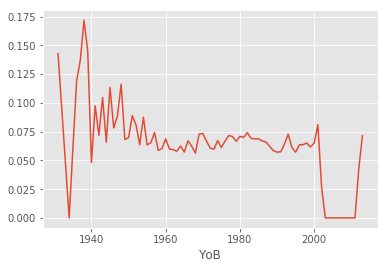

In [290]:
students.groupby('YoB')['explored'].mean().plot()

dip at the bottom is due to a lack of data for those years

### Education

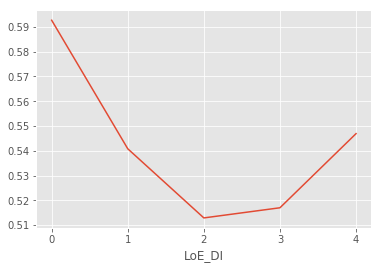

In [56]:
students.groupby('LoE_DI')['only_viewed'].mean().plot(xticks=[0,1,2,3,4])

students with Bachelor's and Master's degree have lowest view only rate

**Course**

In [ ]:
students.groupby('course')['only_viewed'].mean().plot(kind='bar')

In [ ]:
students.groupby('university')['only_viewed'].mean().plot(kind="bar")

# Causes of Non-Completion

Examining the different reasons students didn't complete a certificate

In [342]:
explored = students[students.explored == 1 ]

In [343]:
explored.describe()

,viewed,explored,certified,LoE_DI,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,chapter_percent,only_registered,only_viewed,only_explored,eventsPerDay,active_interval,postsPerDay,videosPerDay
count,37639.000000,37639.0,37639.000000,29570.000000,29772.000000,36740.000000,37639.000000,37639.000000,23790.000000,37639.000000,37639.000000,0.0,37639.000000,37639.0,37639.0,37639.000000,37639.000000,37639,37639.000000,23790.000000
mean,0.999841,1.0,0.451287,1.986811,1984.993719,0.453887,3369.528043,32.640692,550.434889,14.448418,0.140227,NaN,0.811626,0.0,0.0,0.548713,91.661892,148 days 14:22:18.080182,0.003390,13.375645
std,0.012625,0.0,0.497628,0.902776,9.116362,0.389936,3781.258967,26.076337,820.407163,6.275304,0.707799,NaN,0.168577,0.0,0.0,0.497628,83.173569,78 days 15:28:45.026809,0.017849,19.570895
min,0.000000,1.0,0.000000,0.000000,1931.000000,0.000000,1.000000,1.000000,1.000000,6.000000,0.000000,NaN,0.473684,0.0,0.0,0.000000,0.250000,-194 days +00:00:00,0.000000,0.009009
25%,1.000000,1.0,0.000000,1.000000,1982.000000,0.000000,362.000000,12.000000,101.000000,11.000000,0.000000,NaN,0.666667,0.0,0.0,0.000000,28.738636,97 days 00:00:00,0.000000,3.909091
50%,1.000000,1.0,0.000000,2.000000,1987.000000,0.470000,2123.000000,27.000000,318.000000,12.000000,0.000000,NaN,0.842105,0.0,0.0,1.000000,83.750000,140 days 00:00:00,0.000000,8.876524
75%,1.000000,1.0,1.000000,3.000000,1991.000000,0.850000,5203.000000,48.000000,701.000000,17.000000,0.000000,NaN,0.947368,0.0,0.0,1.000000,128.648011,193 days 00:00:00,0.000000,16.909091
max,1.000000,1.0,1.000000,4.000000,2013.000000,1.010000,61376.000000,162.000000,34596.000000,48.000000,20.000000,NaN,1.000000,0.0,0.0,1.000000,2457.153846,409 days 00:00:00,0.714286,957.583333


## Forum Posts

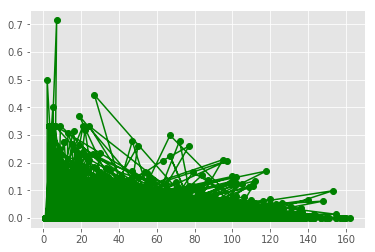

In [311]:
plt.plot(explored.ndays_act, explored.postsPerDay, color='green', marker='o')

In [310]:
np.corrcoef(explored.ndays_act, explored.nforum_posts)

array([[1.        , 0.19929595],
       [0.19929595, 1.        ]])

In [309]:
np.corrcoef(explored.ndays_act, explored.postsPerDay)

array([[1.        , 0.06357385],
       [0.06357385, 1.        ]])

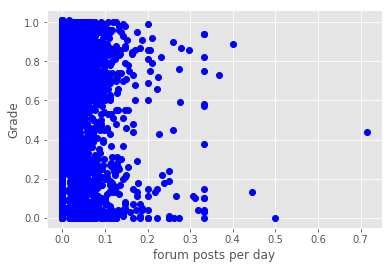

In [326]:
plt.plot(explored.postsPerDay, explored.grade, color='blue', marker='o', linestyle="none")
plt.xlabel("forum posts per day")
plt.ylabel("Grade")
plt.savefig("forumPosts.png")

In [323]:
postCorr = explored[["postsPerDay", "grade", "certified"]]
postCorr.corr()

,postsPerDay,grade,certified
postsPerDay,1.000000,0.048250,0.042654
grade,0.048250,1.000000,0.911893
certified,0.042654,0.911893,1.000000


## Videos

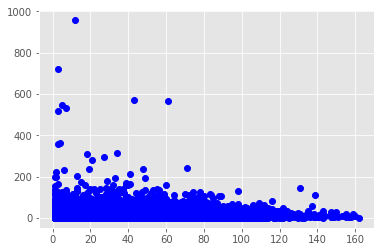

In [345]:
plt.plot(explored.ndays_act, explored.videosPerDay, color='blue', marker='o', linestyle="none")


In [383]:
videoCorr = explored[["videosPerDay", "ndays_act", "grade"]]
videoCorr.corr()

,videosPerDay,ndays_act,grade
videosPerDay,1.000000,-0.018253,-0.061213
ndays_act,-0.018253,1.000000,0.584436
grade,-0.061213,0.584436,1.000000


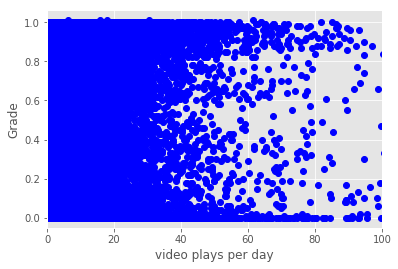

In [348]:
plt.plot(explored.videosPerDay, explored.grade, color='blue', marker='o', linestyle="none")
plt.xlabel("video plays per day")
plt.ylabel("Grade")
plt.xlim(0,100)
plt.savefig("videos.png")

In [391]:
X = explored.loc[:,['videosPerDay']].fillna(0)
y = explored.loc[:,["certified"]]

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [393]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [394]:
y_pred = LogReg.predict(X_test)

In [395]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[5932,  297],
       [4805,  258]])

In [396]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70      6229
           1       0.46      0.05      0.09      5063

   micro avg       0.55      0.55      0.55     11292
   macro avg       0.51      0.50      0.40     11292
weighted avg       0.51      0.55      0.43     11292

0.5481756996103436


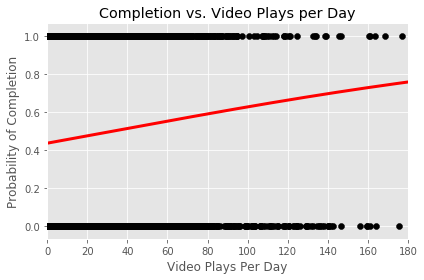

In [397]:
plt.figure(1)
plt.clf()
plt.scatter(X.values.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 200, 2000)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * LogReg.coef_ + LogReg.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.xlim(0, 100)
plt.ylabel('Probability of Completion')
plt.xlabel('Video Plays Per Day')
plt.xticks(range(0, 200, 20))
plt.title("Completion vs. Video Plays per Day")
plt.tight_layout()
plt.savefig('videoCurve.png')
plt.show()

In [381]:
explored.certified.mean()

0.4512872286723877

# Grade Distribution

In [405]:
nonzero_grades = students[students.grade != 0]
nonzero_grades.groupby(['course']).grade.describe()

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
14.73x,6253.0,0.333109,0.345071,0.01,0.03,0.15,0.70,1.00
2.01x,1064.0,0.270282,0.324696,0.01,0.06,0.06,0.55,1.00
3.091x,2700.0,0.309504,0.359283,0.01,0.04,0.08,0.69,1.00
6.002x,8907.0,0.296782,0.362546,0.01,0.03,0.08,0.60,1.00
6.00x,24885.0,0.173598,0.285661,0.01,0.01,0.02,0.20,1.00
7.00x,3651.0,0.244092,0.303034,0.01,0.02,0.06,0.46,0.99
8.02x,3860.0,0.244997,0.327470,0.01,0.01,0.05,0.40,1.00
8.MReV,1677.0,0.215194,0.282435,0.01,0.02,0.06,0.36,1.00
CB22x,2125.0,0.190151,0.273948,0.01,0.02,0.05,0.20,1.00


Text(0.5, 1.0, 'Grade Distribution')

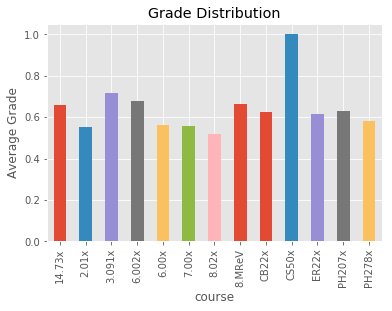

In [457]:
nonzero_grades = explored[explored.grade > 0]
nonzero_grades.groupby(['course']).grade.mean().plot(kind="bar")
plt.ylabel("Average Grade")
plt.title("Grade Distribution")

In [458]:
grade_table = nonzero_grades[['course', 'grade']]
grade_table.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


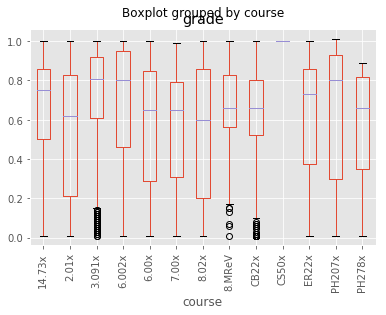

In [459]:
grade_table.boxplot(column='grade', by='course', rot=90)

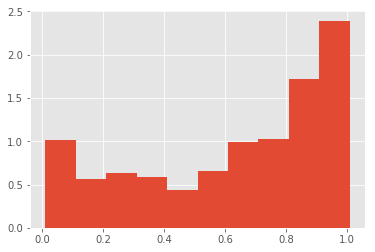

In [460]:
nonzero_grades.grade.hist(density=True)

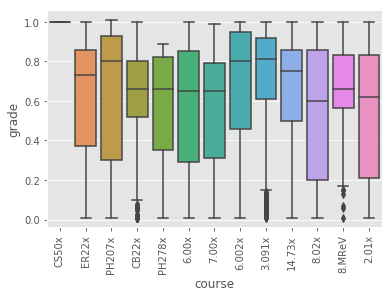

In [462]:
sns.boxplot(x="course", y="grade", data=nonzero_grades)
plt.xticks(rotation=90)
plt.savefig("gradeDist.png")

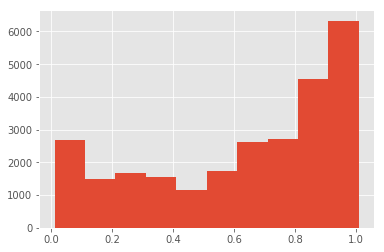

In [463]:
nonzero_grades.grade.hist()

In [534]:
def check_list(N, L):
    test_list = [i for i in L]
    for item in L:
        test_list.remove(item)
        if (N-item) in test_list:
            return True
    return False
            
        
    
        

In [537]:
check_list(6,l)

False

In [535]:
l

[1, 2, 3]

In [499]:
5-3 in l

True

In [531]:
l = [1,2,3]

In [473]:
l.remove(3)

In [496]:
sum(4,3)

TypeError: 'int' object is not iterable